In [184]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# import files

historic_gas_price = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Historic Gas Prices.xlsx")
GB_price = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/GB Prices.xlsx")
market = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Prices and NIV.xlsx")
wind_demand = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Wind and Demand.xlsx", sheet_name= 1, header= 1)
actual_wind_demand = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Wind and Demand.xlsx", header= 1)


In [198]:
print('GB_price', GB_price.shape)
print('historic_gas_price', historic_gas_price.shape)
print('market', market.shape)
print('wind_demand', wind_demand.shape)
print('actual_wind_demand', actual_wind_demand.shape)


GB_price (40608, 4)
historic_gas_price (844, 2)
market (39355, 10)
wind_demand (40510, 5)
actual_wind_demand (40508, 5)


In [199]:
# considering time slots as categorical 
time_slots = ['23:00:00', '23:30:00', '00:00:00', '00:30:00', '01:00:00',
       '01:30:00', '02:00:00', '02:30:00', '03:00:00', '03:30:00',
       '04:00:00', '04:30:00', '05:00:00', '05:30:00', '06:00:00',
       '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00',
       '09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00',
       '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00',
       '16:30:00', '17:00:00', '17:30:00', '18:00:00', '18:30:00',
       '19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00',
       '21:30:00', '22:00:00', '22:30:00']

In [200]:
def convert_dtypes(df, targ_cols, convert_to):
    cols = df.columns
    for col in cols:
        if col in targ_cols:
            if convert_to == 'date':
                df[col] = pd.to_datetime(df[col], dayfirst=True).dt.normalize()
            elif convert_to == 'time' :
                df[col] = pd.to_datetime(df[col], dayfirst=True).time.normalize()
            else:
                df[col] = df[col].values.astype(convert_to)
    return df

def get_time_slots_cat(time): 
    return time_slots.index(time)

def getYear(data):
    return pd.to_datetime(data, dayfirst=True).to_period('Y')

In [201]:
GB_price = GB_price.rename(columns= {'Start Date Time': 'start_date','Trade Date': 'trade_date', 'Start Time': 'start_time','GB Price (€/MWh)': 'price'})

GB_price = convert_dtypes(GB_price, ['trade_date', 'start_date'], 'date')
GB_price['year'] = GB_price['start_date'].apply(getYear)
GB_price['start_time_cat'] = GB_price['start_time'].apply(get_time_slots_cat)

GB_price

,start_date,trade_date,start_time,price,year,start_time_cat
0,2020-12-31,2021-01-01,23:00:00,74.979000,2020,0
1,2020-12-31,2021-01-01,23:30:00,74.979000,2020,1
2,2021-01-01,2021-01-01,00:00:00,75.534400,2021,2
3,2021-01-01,2021-01-01,00:30:00,75.534400,2021,3
4,2021-01-01,2021-01-01,01:00:00,69.647160,2021,4
...,...,...,...,...,...,...
40603,2023-04-26,2023-04-26,20:30:00,155.953800,2023,43
40604,2023-04-26,2023-04-26,21:00:00,134.719221,2023,44
40605,2023-04-26,2023-04-26,21:30:00,134.719221,2023,45
40606,2023-04-26,2023-04-26,22:00:00,122.728860,2023,46


In [202]:
historic_gas_price = historic_gas_price.rename(columns= {'Date': 'date','Gas Price £/Therm': 'price'})

historic_gas_price['year'] = historic_gas_price['date'].apply(getYear)
historic_gas_price = convert_dtypes(historic_gas_price, ['date'], 'date')
historic_gas_price

,date,price,year
0,2021-01-01,57.750,2021
1,2021-01-02,57.750,2021
2,2021-01-03,57.750,2021
3,2021-01-04,57.450,2021
4,2021-01-05,59.700,2021
...,...,...,...
839,2023-04-20,95.000,2023
840,2023-04-21,95.250,2023
841,2023-04-22,99.125,2023
842,2023-04-23,99.125,2023


In [203]:
# clean up wind demand dataset

if 'Unnamed: 0' in wind_demand.columns:
    wind_demand = wind_demand.drop(columns=['Unnamed: 0'])

wind_demand = wind_demand.rename(columns= {'Start Date': 'start_date','Trade Date': 'trade_date', 'Start Time 30 Minute Period': 'start_time','Demand (MW)': 'demand'})

wind_demand['year'] = wind_demand['start_date'].apply(getYear)
wind_demand = convert_dtypes(wind_demand, ['trade_date', 'start_date'], 'date')
wind_demand['start_time_cat'] = wind_demand['start_time'].apply(get_time_slots_cat)

wind_demand

C:\Users\Varun\AppData\Local\Temp\ipykernel_4964\3311548406.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(data).to_period('Y')


,trade_date,start_date,start_time,demand,year,start_time_cat
0,2021-01-01,2020-12-31,23:00:00,4209,2020,0
1,2021-01-01,2020-12-31,23:30:00,4159,2020,1
2,2021-01-01,2021-01-01,00:00:00,4016,2021,2
3,2021-01-01,2021-01-01,00:30:00,3891,2021,3
4,2021-01-01,2021-01-01,01:00:00,3767,2021,4
...,...,...,...,...,...,...
40505,2023-04-24,2023-04-24,20:30:00,4977,2023,43
40506,2023-04-24,2023-04-24,21:00:00,5071,2023,44
40507,2023-04-24,2023-04-24,21:30:00,4978,2023,45
40508,2023-04-24,2023-04-24,22:00:00,4762,2023,46


In [204]:
actual_wind_demand
if 'Unnamed: 0' in actual_wind_demand.columns:
    actual_wind_demand = actual_wind_demand.drop(columns=['Unnamed: 0'])

actual_wind_demand = actual_wind_demand.rename(columns= {'Start Date': 'start_date','Trade Date': 'trade_date', 'Start Time 30 Minute Period': 'start_time','Actual Wind (MW)': 'wind'})

actual_wind_demand['year'] = actual_wind_demand['start_date'].apply(getYear)
actual_wind_demand = convert_dtypes(actual_wind_demand, ['trade_date', 'start_date'], 'date')
actual_wind_demand['start_time_cat'] = actual_wind_demand['start_time'].apply(get_time_slots_cat)

actual_wind_demand

C:\Users\Varun\AppData\Local\Temp\ipykernel_4964\3311548406.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(data).to_period('Y')


,trade_date,start_date,start_time,wind,year,start_time_cat
0,2021-01-01,2020-12-31,23:00:00,2690,2020,0
1,2021-01-01,2020-12-31,23:30:00,2571,2020,1
2,2021-01-01,2021-01-01,00:00:00,2506,2021,2
3,2021-01-01,2021-01-01,00:30:00,2513,2021,3
4,2021-01-01,2021-01-01,01:00:00,2503,2021,4
...,...,...,...,...,...,...
40503,2023-04-24,2023-04-24,20:30:00,559,2023,43
40504,2023-04-24,2023-04-24,21:00:00,621,2023,44
40505,2023-04-24,2023-04-24,21:30:00,645,2023,45
40506,2023-04-24,2023-04-24,22:00:00,643,2023,46


In [217]:

if 'Unnamed: 0' in market.columns:
    market = market.drop(columns=['Unnamed: 0'])
    market.columns = ['start_date', 'trade_date', 'start_time', 'DAM', 'IDA1', 'IDA2', 'IDA3', "BM", 'net_volume']

if market.iloc[0,0] == 'Start Date':
    market = market.drop(index=[0])


market['year'] = market['start_date'].apply(getYear)
market = convert_dtypes(market, ['trade_date', 'start_date'], 'date')
market['start_time_cat'] = market['start_time'].apply(get_time_slots_cat)

market


,start_date,trade_date,start_time,DAM,IDA1,IDA2,IDA3,BM,net_volume,year,start_time_cat
1,2020-12-31,2021-01-01,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488,2020,0
2,2020-12-31,2021-01-01,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496,2020,1
3,2021-01-01,2021-01-01,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048,2021,2
4,2021-01-01,2021-01-01,00:30:00,54.02,67,NaN,NaN,25.95,-153.72,2021,3
5,2021-01-01,2021-01-01,01:00:00,53,64,NaN,NaN,26.06,-86.304,2021,4
...,...,...,...,...,...,...,...,...,...,...,...
39350,2023-03-31,2023-03-31,20:30:00,135.8,125.11,115,105,100.52,-71.112,2023,43
39351,2023-03-31,2023-03-31,21:00:00,132.38,136.68,127.72,119.41,103.3,-128.352,2023,44
39352,2023-03-31,2023-03-31,21:30:00,132.38,125,112.7,113.12,103.35,-189.444,2023,45
39353,2023-03-31,2023-03-31,22:00:00,121.4,131.25,121,119.17,103.97,-112.74,2023,46


In [218]:
# considering 3 timeseries based on market opening timings

market_1 = market[market['IDA2'].isna() & market['IDA3'].isna()]
market_2 = market[(~market['IDA2'].isna()) & market['IDA3'].isna()]
market_3 = market[(~market['IDA2'].isna()) & (~market['IDA3'].isna())]


In [219]:
# verifying data loss

print(market_1.shape)
print(market_2.shape)
print(market_2.shape)
print(market_4.shape)

len(market) - (len(market_1) + len(market_2) +len(market_3))

market[(market['IDA2'].isna()) & (~market['IDA3'].isna())]

market[~(market['start_date'] == '2021-06-28')]

# IDA2 data for 28-06-2021 is missing

(19686, 11)
(9828, 11)
(9828, 11)
(12, 10)


,start_date,trade_date,start_time,DAM,IDA1,IDA2,IDA3,BM,net_volume,year,start_time_cat
1,2020-12-31,2021-01-01,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488,2020,0
2,2020-12-31,2021-01-01,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496,2020,1
3,2021-01-01,2021-01-01,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048,2021,2
4,2021-01-01,2021-01-01,00:30:00,54.02,67,NaN,NaN,25.95,-153.72,2021,3
5,2021-01-01,2021-01-01,01:00:00,53,64,NaN,NaN,26.06,-86.304,2021,4
...,...,...,...,...,...,...,...,...,...,...,...
39350,2023-03-31,2023-03-31,20:30:00,135.8,125.11,115,105,100.52,-71.112,2023,43
39351,2023-03-31,2023-03-31,21:00:00,132.38,136.68,127.72,119.41,103.3,-128.352,2023,44
39352,2023-03-31,2023-03-31,21:30:00,132.38,125,112.7,113.12,103.35,-189.444,2023,45
39353,2023-03-31,2023-03-31,22:00:00,121.4,131.25,121,119.17,103.97,-112.74,2023,46


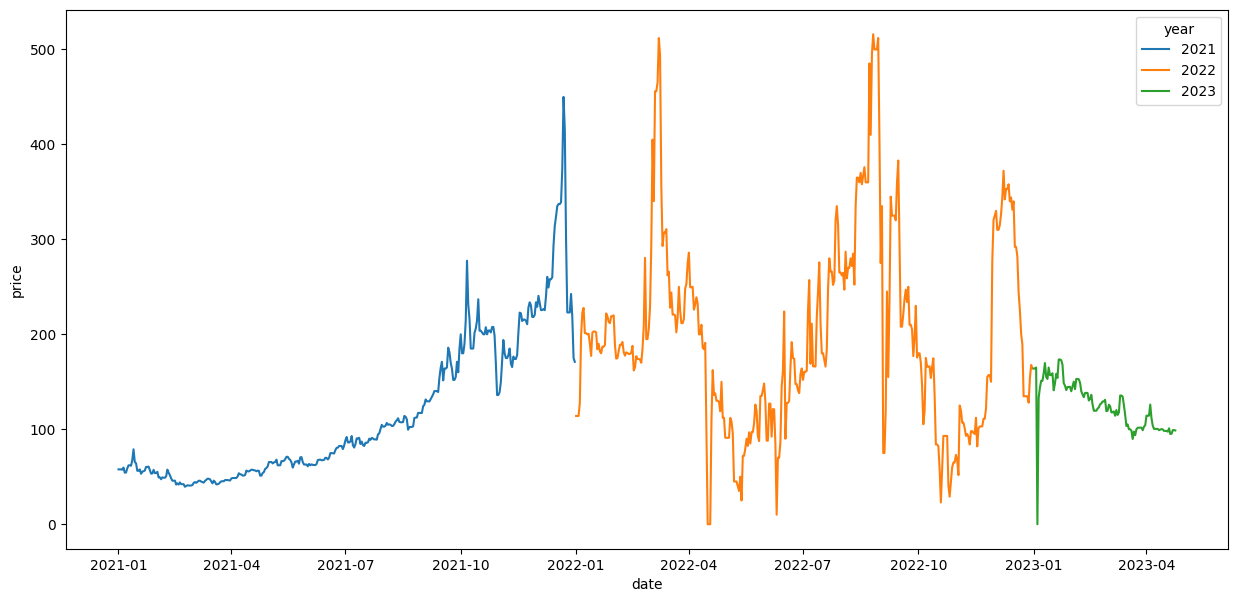

In [222]:
plt.figure(figsize=[15,7])
sns.lineplot(data=historic_gas_price, x='date', y='price', hue='year');
plt.show()

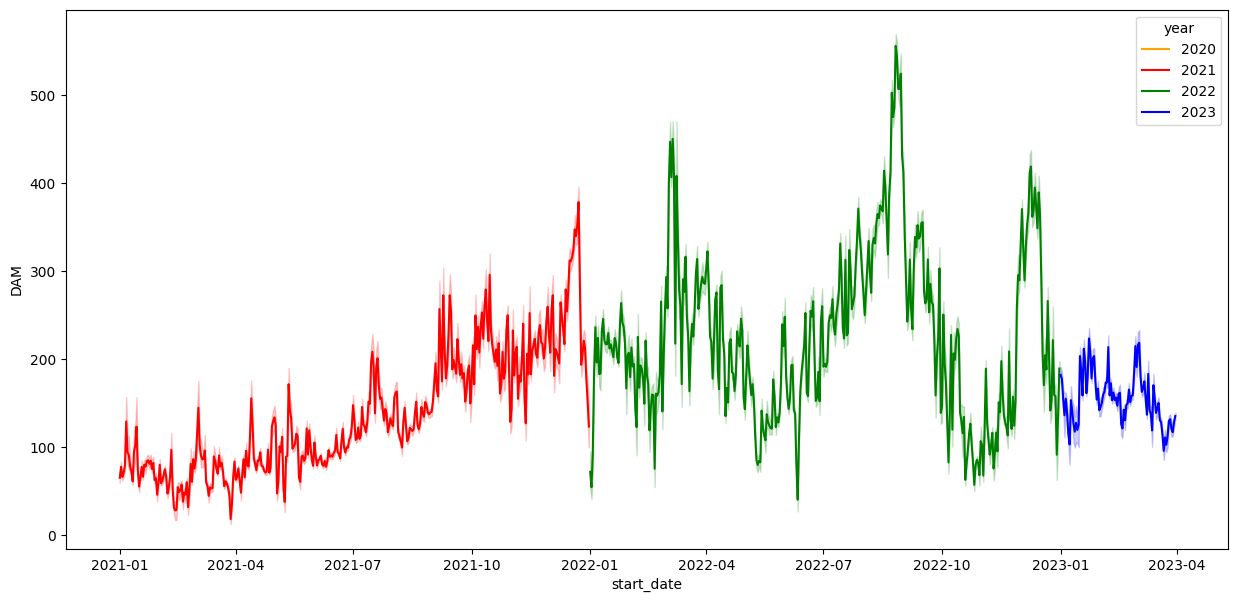

In [230]:
plt.figure(figsize=[15,7])
sns.lineplot(data=market, x='start_date', y='DAM', hue='year', palette=['orange','red', 'green', 'blue']);
plt.show()

In [ ]:
plt.figure(figsize=[15,7])
sns.lineplot(data=market, x='start_date', y='DAM');
plt.show()